# NLP Product Category Analysis

In [1]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Hasnan
[nltk_data]     Ramadhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import Dataset

In [2]:
# Import dataset
data = 'ecommerceDataset.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


## Data Cleaning and EDA

In [4]:
df.rename(columns = {'Household':'category'}, inplace = True)

In [5]:
df.head()

,category,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [6]:
df.rename(columns= {'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.' : 'Text Description'}, inplace = True)

In [7]:
df.tail()

,category,Text Description
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."
50423,Electronics,Micromax Canvas Win W121 (White)


In [8]:
df.isnull().sum()

category            0
Text Description    1
dtype: int64

## Preprocessing

In [9]:
df_copy = df.copy()

In [10]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,Text Description,Books,Clothing & Accessories,Electronics,Household
0,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",False,False,False,True
1,SAF 'UV Textured Modern Art Print Framed' Pain...,False,False,False,True
2,"SAF Flower Print Framed Painting (Synthetic, 1...",False,False,False,True
3,Incredible Gifts India Wooden Happy Birthday U...,False,False,False,True
4,Pitaara Box Romantic Venice Canvas Painting 6m...,False,False,False,True
...,...,...,...,...,...
50419,Strontium MicroSD Class 10 8GB Memory Card (Bl...,False,False,True,False
50420,CrossBeats Wave Waterproof Bluetooth Wireless ...,False,False,True,False
50421,Karbonn Titanium Wind W4 (White) Karbonn Titan...,False,False,True,False
50422,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",False,False,True,False


In [11]:
df_baru.columns

Index(['Text Description', 'Books', 'Clothing & Accessories', 'Electronics',
       'Household'],
      dtype='object')

## Modelling

In [12]:
desc = df_baru['Text Description'].values
label = df_baru[['Books', 'Clothing & Accessories', 'Electronics',
       'Household']].values

In [13]:
import re
from nltk.tokenize import word_tokenize


def remove_numbers(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        words_without_numbers = [word for word in words if not re.match(r'\d', word)]
        cleaned_text = ' '.join(words_without_numbers)
        return cleaned_text
    else:
        return str(text)

In [14]:
import numpy as np

remove_numbers_vectorized = np.vectorize(remove_numbers)
desc = remove_numbers_vectorized(desc)

# Display the modified NumPy array
print(desc)

["SAF 'Floral ' Framed Painting ( Wood , inch x inch , Special Effect UV Print Textured , SAO297 ) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it . This is an special series of paintings which makes your wall very beautiful and gives a royal touch ( A perfect gift for your special ones ) ."
 "SAF 'UV Textured Modern Art Print Framed ' Painting ( Synthetic , cm x cm x cm , Set of ) Color : Multicolor | Size:35 cm x cm x cm Overview a beautiful painting involves the action or skill of using paint in the right manner ; hence , the end product will be a picture that can speak a thousand words they say . Arts have been in trend for quite some time now . It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quite abstract and mysteriously beautiful . The painting has a nice frame to it . You can gift this to a family or a friend . The painting has various forms of certa

In [15]:
desc_latih, desc_test, label_latih, label_test = train_test_split(desc, label, test_size=0.2)

In [16]:
tokenizer = Tokenizer(num_words=5000, oov_token='oov')
tokenizer.fit_on_texts(desc_latih)
tokenizer.fit_on_texts(desc_test)

# mengurutkan kalimat untuk di tokenizer
sekuens_latih = tokenizer.texts_to_sequences(desc_latih)
sekuens_test = tokenizer.texts_to_sequences(desc_test)

 # memastikan setiap tokenizer memiliki panjang yang sama
padded_latih = pad_sequences(sekuens_latih, truncating='post')
padded_test = pad_sequences(sekuens_test, truncating='post')

In [17]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          100000    
                                                                 
 lstm (LSTM)                 (None, 64)                21760     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    padded_latih,
    label_latih,
    epochs=20,
    batch_size=32,
    steps_per_epoch=50,
    validation_data=(padded_test, label_test),
    validation_steps=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
50/50 [==============================] - 222s 4s/step - loss: 1.1578 - accuracy: 0.5106 - val_loss: 0.9847 - val_accuracy: 0.5375
Epoch 2/20
50/50 [==============================] - 205s 4s/step - loss: 0.8683 - accuracy: 0.5987 - val_loss: 0.9603 - val_accuracy: 0.5875
Epoch 3/20
50/50 [==============================] - 211s 4s/step - loss: 0.8118 - accuracy: 0.6725 - val_loss: 0.8121 - val_accuracy: 0.6687
Epoch 4/20
50/50 [==============================] - 226s 5s/step - loss: 0.6717 - accuracy: 0.7531 - val_loss: 0.6436 - val_accuracy: 0.8000
Epoch 5/20
50/50 [==============================] - 241s 5s/step - loss: 0.5707 - accuracy: 0.8087 - val_loss: 0.5639 - val_accuracy: 0.8250
Epoch 6/20
50/50 [==============================] - 205s 4s/step - loss: 0.4930 - accuracy: 0.8300 - val_loss: 0.5032 - val_accuracy: 0.8562
Epoch 7/20
50/50 [==============================] - 248s 5s/step - loss: 0.4506 - accuracy: 0.8562 - val_loss: 0.4193 - val_accuracy: 0.8562
Epoch 8/20
50

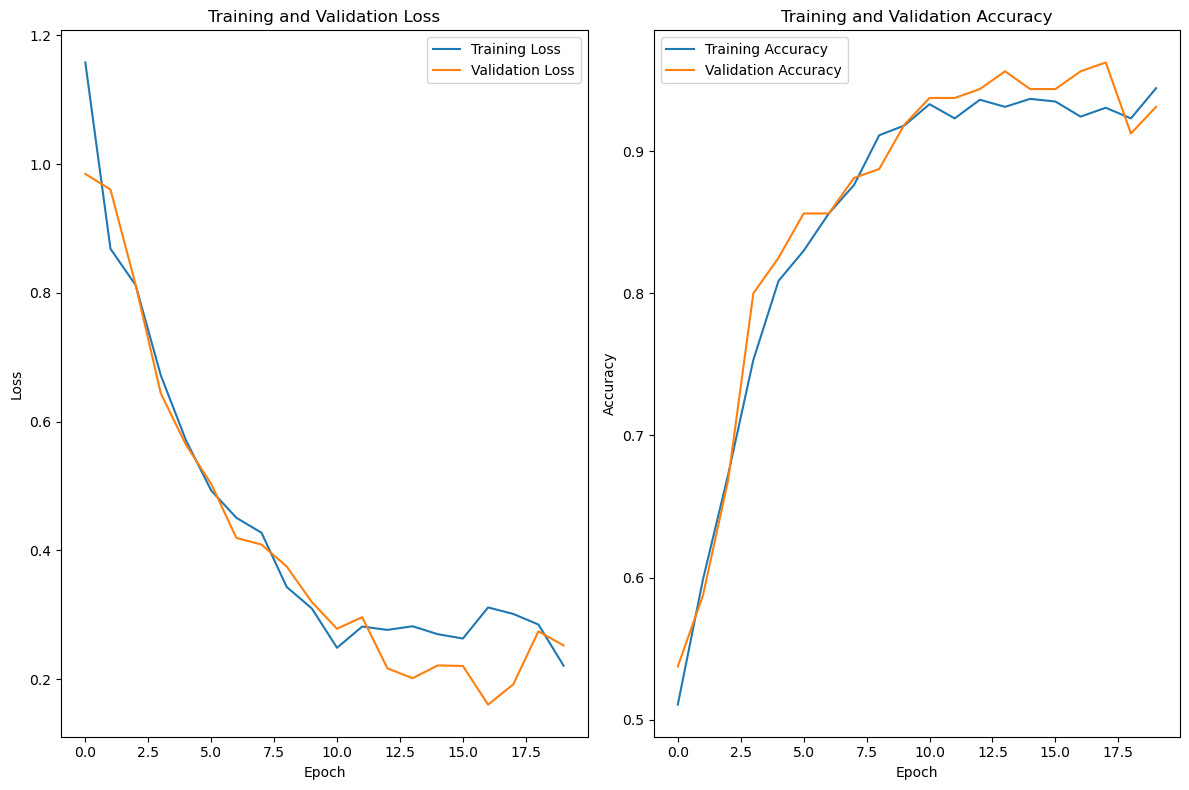

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()